In [2]:
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
# Make a reference to the csv file path
df = "Resources\defunciones.csv"
# Import the books.csv file as a DataFrame
df = pd.read_csv(df,low_memory=False)
#Filtrar solo por muertes de coronavirus
dfcovid = df.drop(df[df['RESULTADO'] != 1].index)

In [7]:
#formatear la base
dfcovid["ORIGEN"] = dfcovid["ORIGEN"].replace([1,2],["USMER", "FUERA DE USMER"])
dfcovid[["INTUBADO","NEUMONIA","EMBARAZO","HABLA_LENGUA_INDIG","DIABETES","EPOC","ASMA","INMUSUPR","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA","TABAQUISMO"]] = dfcovid[["INTUBADO","NEUMONIA","EMBARAZO","HABLA_LENGUA_INDIG","DIABETES","EPOC","ASMA","INMUSUPR","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA","TABAQUISMO"]].replace([1,2,97,98,99],["SI", "NO","NO APLICA","SE IGNORA","NO ESPECIFICADO"])
dfcovid["SEXO"] = dfcovid["SEXO"].replace([1,2],["MUJER", "HOMBRE"])
dfcovid["SECTOR"] = dfcovid["SECTOR"].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,99],["CRUZ ROJA","DIF","ESTATAL","IMSS","IMSS-BIENESTAR","ISSSTE","MUNICIPAL","PEMEX","PRIVADA","SEDENA", "SEMAR","SSA","UNIVERSITARIO","NO ESPECIFICADO"])
dfcovid["TIPO_PACIENTE"] = dfcovid["TIPO_PACIENTE"].replace([1,2,99],["AMBULATORIO", "HOSPITALIZADO","NO ESPECIFICADO"])

dfcovid.head()

,FECHA_DEF,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-06-18,2020-07-28,02b80a,FUERA DE USMER,ESTATAL,15,HOMBRE,15,15,106,...,NO,NO,NO,NO,2,1,99,MÃ©xico,99,97
1,2020-05-02,2020-07-28,1020c0,FUERA DE USMER,IMSS,14,HOMBRE,14,14,39,...,NO,NO,NO,NO,99,1,99,MÃ©xico,99,2
2,2020-04-23,2020-07-28,1a6201,FUERA DE USMER,IMSS,9,HOMBRE,15,15,121,...,NO,NO,NO,NO,99,1,99,MÃ©xico,99,2
3,2020-04-13,2020-07-28,00c191,FUERA DE USMER,IMSS,9,HOMBRE,21,9,11,...,NO,SI,NO,NO,99,1,99,MÃ©xico,99,2
4,2020-07-16,2020-07-28,1d8f4a,FUERA DE USMER,ESTATAL,2,HOMBRE,2,2,2,...,NO,NO,NO,NO,99,1,99,MÃ©xico,99,2


In [12]:
#Stats
#cuantas muertes por covid19 existen
total_deaths = len(dfcovid["RESULTADO"])
#Cuantos hombres han muerto por covid19
men_death = (dfcovid['SEXO'].values == 'HOMBRE').sum()
#Cuantas mujeres han muerto por covid19
women_death = (dfcovid['SEXO'].values == 'MUJER').sum()
#Cuantos casos que terminaron en defunciones se atendieron en el sector privado de salud
private_deaths = (dfcovid['SECTOR'].values == 'PRIVADA').sum()
#Cuantos casos que terminaron en defunciones se atendieron en el sector publico de salud
public_deaths = total_deaths - private_deaths
#Pacientes fallecidos en casa
ambulatory_deaths = (dfcovid['TIPO_PACIENTE'].values == 'AMBULATORIO').sum()
#Pacientes fallecidos en el hospital
hospital_deaths = total_deaths - ambulatory_deaths
#Pacientes fallecidos que fueron intubados
intubated_deaths = (dfcovid['INTUBADO'].values == 'SI').sum()
#Pacientes fallecidos que no fueron intubados
nointubated_deaths = total_deaths - intubated_deaths

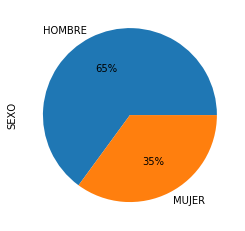

In [18]:
#Gender Mortality
gender_mortality = dfcovid["SEXO"].value_counts().plot(kind='pie', autopct='%1.0f%%')

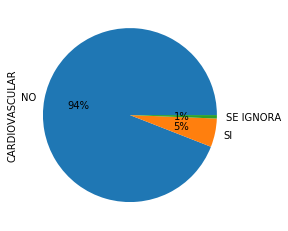

In [19]:
##Pre Existing Medical Conditions
cardiovascular = dfcovid["CARDIOVASCULAR"].value_counts().plot(kind='pie', autopct='%1.0f%%')

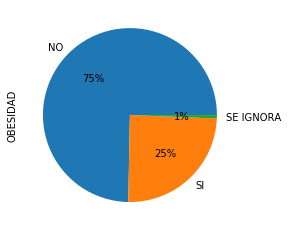

In [20]:
##Pre Existing Medical Conditions
obesidad = dfcovid["OBESIDAD"].value_counts().plot(kind='pie', autopct='%1.0f%%')

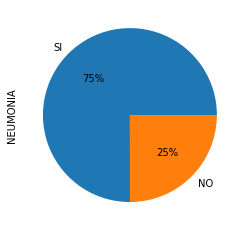

In [21]:
##Pre Existing Medical Conditions
neumonia = dfcovid["NEUMONIA"].value_counts().plot(kind='pie', autopct='%1.0f%%')

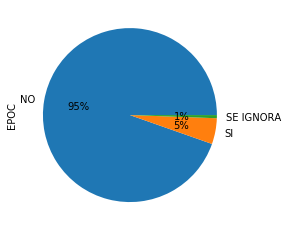

In [22]:
##Pre Existing Medical Conditions
epoc = dfcovid["EPOC"].value_counts().plot(kind='pie', autopct='%1.0f%%')

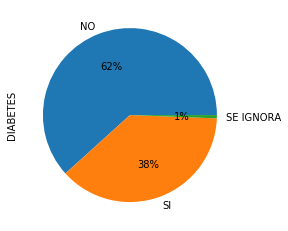

In [23]:
##Pre Existing Medical Conditions
diabetes = dfcovid["DIABETES"].value_counts().plot(kind='pie', autopct='%1.0f%%')

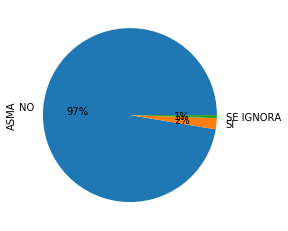

In [24]:
##Pre Existing Medical Conditions
asma = dfcovid["ASMA"].value_counts().plot(kind='pie', autopct='%1.0f%%')

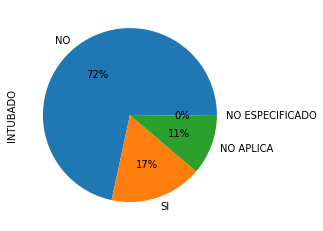

In [25]:
##Pre Existing Medical Conditions
intubado = dfcovid["INTUBADO"].value_counts().plot(kind='pie', autopct='%1.0f%%')

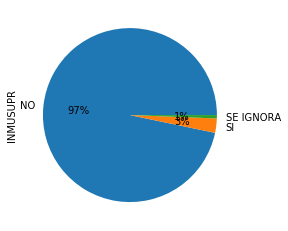

In [26]:
##Pre Existing Medical Conditions
inmusupur = dfcovid["INMUSUPR"].value_counts().plot(kind='pie', autopct='%1.0f%%')

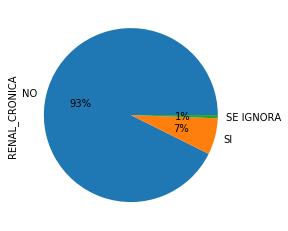

In [27]:
##Pre Existing Medical Conditions
renal = dfcovid["RENAL_CRONICA"].value_counts().plot(kind='pie', autopct='%1.0f%%')

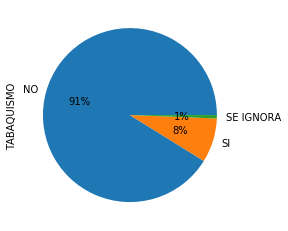

In [28]:
tabaquismo = dfcovid["TABAQUISMO"].value_counts().plot(kind='pie', autopct='%1.0f%%')